## 推測統計　（推定と検定）
### 推定　（点推定と区間推定）
#### 区間推定

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### 比率の区間推定

In [3]:
sample_df = df.sample(50)
male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
male_ratio = 0.5
min_num, max_num = stats.binom.interval(0.95, n=50, p=male_ratio)
print(min_num/len(sample_df), max_num/len(sample_df))
print(min_num, max_num)

0.36 0.64
18.0 32.0


In [4]:
male_ratio

0.5

In [5]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [6]:
n = 50
k = 100
alpha = 0.95
column = 'sex'
inter_list = []
for _ in range(k):
    tmp_x = df[column].sample(n)
    p = (tmp_x == 'Male').sum()/n
    inter = stats.binom.interval(alpha, n, p)
    inter_list.append(stats.binom.interval(alpha, n, p))

In [7]:
x = df[column]
p = (x == 'Male').sum()/len(x)
print(p)

0.6434426229508197


In [8]:
p = p
cnt = 0
for i in inter_list:
    if i[0]/n < p < i[1]/n:
        cnt += 1
print(cnt)

95


In [9]:
i[0]/50

0.5

### 平均値の区間推定

In [8]:
n = 50
k = 100
alpha = 0.95
column = 'tip'
inter_list = []
for _ in range(k):
    tmp_x = df[column].sample(n)
    tmp_std = np.sqrt(stats.tvar(df[column]))
    tmp_mean = np.mean(tmp_x)
    inter_list.append(stats.norm.interval(alpha, tmp_mean, tmp_std/np.sqrt(n)))

In [9]:
tmp_x = df[column]
mean_x = np.mean(tmp_x)
mean_x

2.9982786885245902

In [10]:
cnt = 0
for i in inter_list:
    if i[0] < mean_x < i[1]:
        cnt += 1
print(cnt)

96


### t分布

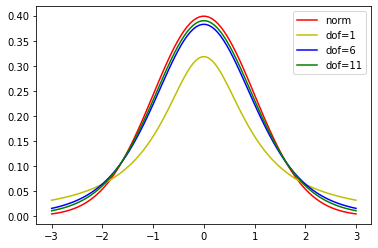

In [10]:
x =np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
t1 = stats.t(1).pdf(x)
t6 = stats.t(6).pdf(x)
t11 = stats.t(11).pdf(x)
plt.plot(x, z, c="r", label="norm")
plt.plot(x, t1, c="y", label="dof=1")
plt.plot(x, t6, c="b", label="dof=6")
plt.plot(x, t11, c="g", label="dof=11")
plt.legend()
plt.show()

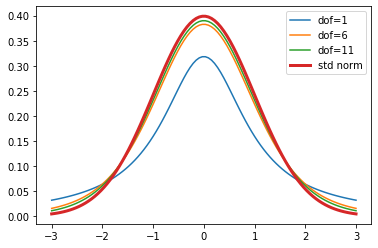

In [21]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"dof={dof}")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

### 平均値の区間推定(t分布)

In [12]:
n = 50
column = 'tip'
alpha = 0.95
dof = n-1

x = df[column].sample(n)
tmp_mean = np.mean(x)
tmp_std = np.sqrt(stats.tvar(x))
interval_norm = stats.norm.interval(alpha=alpha, loc=tmp_mean, scale=tmp_std/np.sqrt(n))

interval_t1 = stats.t.interval(alpha=alpha, loc=tmp_mean, scale=tmp_std/np.sqrt(n), df=dof)
print(interval_norm)
print(interval_t1)

(2.928923719958716, 3.7946762800412834)
(2.9179666138610605, 3.805633386138939)


In [13]:
df[column].mean()

2.9982786885245902

In [14]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
